In [1]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical

import numpy as np
import os
import matplotlib.pyplot as plt
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
dropout = 0.25
dense_layer_nodes = 100
learn_rate = 0.08
batch_size = 256
epochs = 15

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

(X_train, y_train_vect), (X_test, y_test_vect) = cifar10.load_data()

# Convert class vectors to binary class matrices.
y_train = to_categorical(y_train_vect)
y_test = to_categorical(y_test_vect)
nb_classes = y_test.shape[1]

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

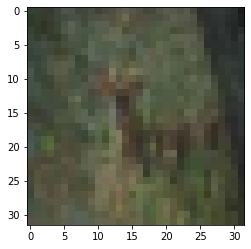

In [3]:
plt.imshow(X_train[10])

## Attention ! Le input_shape doit absolument être de la forme input_shape=(width, height, channels). Si channels est à la fin, il y aura un défaut dans le MaxPooling

In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(dropout))
model.add(Flatten())
model.add(Dense(dense_layer_nodes, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(nb_classes, activation='softmax'))

In [5]:
model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [6]:
model.fit(X_train, y_train, epochs=1, verbose=1, batch_size=1000, validation_data=(X_test, y_test))

Epoch 1/2
50/50 [==============================] - 45s 855ms/step - loss: 2.1064 - accuracy: 0.2234 - val_loss: 1.8456 - val_accuracy: 0.3664
Epoch 2/2
50/50 [==============================] - 28s 553ms/step - loss: 1.8060 - accuracy: 0.3455 - val_loss: 1.6344 - val_accuracy: 0.4363


In [7]:
datagen = ImageDataGenerator()
datagen.fit(X_train)

In [8]:
# Train neural network
history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                        steps_per_epoch=X_train.shape[0] // batch_size,
                        epochs=epochs,
                        validation_data=(X_test, y_test), verbose=1)

Epoch 1/15
195/195 [==============================] - 26s 131ms/step - loss: 1.6134 - accuracy: 0.4125 - val_loss: 1.4242 - val_accuracy: 0.4982
Epoch 2/15
195/195 [==============================] - 26s 131ms/step - loss: 1.4695 - accuracy: 0.4662 - val_loss: 1.3213 - val_accuracy: 0.5354
Epoch 3/15
195/195 [==============================] - 26s 133ms/step - loss: 1.3931 - accuracy: 0.4967 - val_loss: 1.2683 - val_accuracy: 0.5548
Epoch 4/15
195/195 [==============================] - 26s 132ms/step - loss: 1.3461 - accuracy: 0.5202 - val_loss: 1.2205 - val_accuracy: 0.5671
Epoch 5/15
195/195 [==============================] - 26s 132ms/step - loss: 1.3040 - accuracy: 0.5307 - val_loss: 1.2024 - val_accuracy: 0.5775
Epoch 6/15
195/195 [==============================] - 26s 132ms/step - loss: 1.2714 - accuracy: 0.5424 - val_loss: 1.1754 - val_accuracy: 0.5818
Epoch 7/15
195/195 [==============================] - 26s 132ms/step - loss: 1.2443 - accuracy: 0.5501 - val_loss: 1.1536 - val_ac

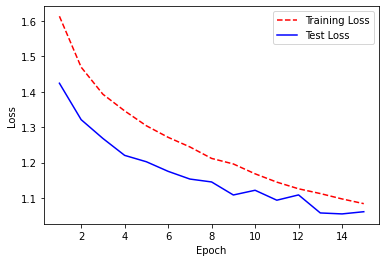

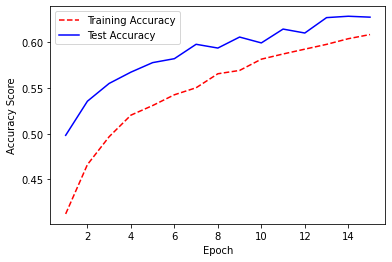

In [9]:
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

# Create count of the number of epochs
epoch_count = range(1, len(training_loss)+1)

plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]

plt.plot(epoch_count, training_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show()